# **Electrical Grid Stability (Phase II)**

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

Load the dataset

In [3]:
data = pd.read_csv("Data_for_UCI_named.csv")

In [4]:
print(data)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

Separate the features (X) and target variable (y)

In [5]:
X = data.iloc[:, :12]
y = data.iloc[:, -1]

In [6]:
print(X)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4  
0    -

In [7]:
print(y)

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object


Convert the target variable stabf from non-numeric to numeric

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
print(y)

[1 0 1 ... 0 1 1]


In [10]:
print(label_encoder.classes_)

['stable' 'unstable']


Splitting into training and testing set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [12]:
print(X_train)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
1249  3.507015  7.153356  4.613492  4.316704  3.805283 -1.843323 -0.769643   
8936  4.382909  9.456287  0.796901  3.470452  4.253830 -1.636117 -1.681423   
4604  5.735298  2.742411  2.265467  0.609000  3.917089 -1.348753 -1.395325   
3168  8.804876  3.358790  4.648564  9.534413  4.626540 -1.982996 -1.594497   
4463  9.632859  0.878894  6.916970  5.203109  3.068386 -1.297168 -1.112700   
...        ...       ...       ...       ...       ...       ...       ...   
4145  3.611261  2.823969  6.443583  5.580119  5.415726 -1.691441 -1.771056   
8301  5.885405  9.989265  8.790848  2.001724  3.995171 -1.952787 -1.468542   
2881  4.760597  2.968432  2.379881  4.834267  3.551370 -0.614905 -1.270966   
7655  3.137950  1.954118  3.652218  1.428319  4.200709 -1.020833 -1.633180   
5181  9.225039  9.204239  5.931763  0.589579  2.629912 -1.131719 -0.993128   

            p4        g1        g2        g3        g4  
1249 -

In [13]:
print(X_test)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
239   1.428128  3.154148  7.371018  9.508479  4.202167 -1.622304 -0.822005   
2973  3.004551  3.564031  8.222813  4.408191  3.448773 -0.576297 -1.581781   
9813  5.726021  4.841845  4.640732  9.712054  3.728711 -1.761249 -1.083126   
5758  1.164488  6.880707  1.985130  2.765434  4.597960 -1.904493 -1.140859   
1303  4.098594  8.548389  2.627716  6.334678  3.502155 -0.707426 -1.634602   
...        ...       ...       ...       ...       ...       ...       ...   
6357  9.441042  5.292349  3.607228  2.493297  3.291877 -1.982049 -0.527902   
1510  5.480170  2.614500  8.600705  7.609927  4.811065 -1.554562 -1.724645   
2751  2.071058  1.035712  9.035289  7.842711  4.249797 -1.922058 -1.243479   
8735  4.411185  5.507860  6.316129  8.437988  3.268763 -1.235929 -0.849871   
6194  3.583689  5.898417  9.368544  9.345189  3.070335 -0.837914 -1.381050   

            p4        g1        g2        g3        g4  
239  -

In [14]:
print(y_train)

[1 0 0 ... 0 1 1]


In [15]:
print(y_test)

[1 1 1 ... 1 1 1]


Apply feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
print(X_train_std)

[[-0.6360014   0.69869998 -0.23314488 ...  0.06651508  0.8069309
  -0.05099622]
 [-0.31745834  1.53777113 -1.6267494  ... -1.23509317  0.17016247
   0.61398951]
 [ 0.17437473 -0.908424   -1.09051159 ...  0.7006983  -0.571096
   0.02407477]
 ...
 [-0.1801019  -0.82607332 -1.04873409 ...  0.3028934  -0.51797018
  -1.10320546]
 [-0.77022176 -1.19563768 -0.5841481  ...  0.48206262 -0.39474414
   0.62744146]
 [ 1.44351439  1.44593763  0.24821347 ...  0.75659962 -0.12234976
  -1.3443294 ]]


In [18]:
print(X_test_std)

[[-1.39204526 -0.75840799  0.77374827 ...  0.45264513 -0.85858439
   1.68662313]
 [-0.8187359  -0.60906748  1.08477604 ... -0.11350936  0.92313035
   1.52182721]
 [ 0.17100083 -0.14349692 -0.22319832 ...  1.37226599  0.96684493
   0.98103145]
 ...
 [-1.15822625 -1.53025808  1.38144661 ... -1.68746326  1.33027735
   0.1589008 ]
 [-0.307175    0.09916519  0.38856223 ... -1.35481229 -0.14048802
   0.64579909]
 [-0.6081166   0.24146433  1.50313264 ... -1.46365506 -0.44856302
   0.96241307]]


# **SVM with RBF Kernel**

In [19]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)

In [20]:
svm_rbf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Tuning the hyperparameters

In [21]:
# For SVM (RBF), we tune the hyperparameters C and gamma
hpt_svm_rbf = {
    'C': [i for i in range(1, 10)],
    'gamma': np.linspace(0.1, 1, 10)
}

In [22]:
print(hpt_svm_rbf)

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [23]:
# Performing grid search
gs_svm_rbf = GridSearchCV(estimator=svm_rbf,
                          param_grid=hpt_svm_rbf,
                          cv=5)

gs_svm_rbf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [24]:
print(gs_svm_rbf.best_params_)

{'C': 9, 'gamma': 0.1}


In [25]:
print(gs_svm_rbf.best_score_)

0.9596


In [26]:
print(gs_svm_rbf.best_estimator_)

SVC(C=9, gamma=0.1, random_state=42)


Train the model with the resulting combination of hyperparameter values

In [27]:
svm_rbf_hpt = SVC(kernel='rbf', C=9, gamma=0.1, random_state=42)
svm_rbf_hpt.fit(X_train_std, y_train)

SVC(C=9, gamma=0.1, random_state=42)

In [28]:
# Predict class using test set
y_pred = svm_rbf_hpt.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [29]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

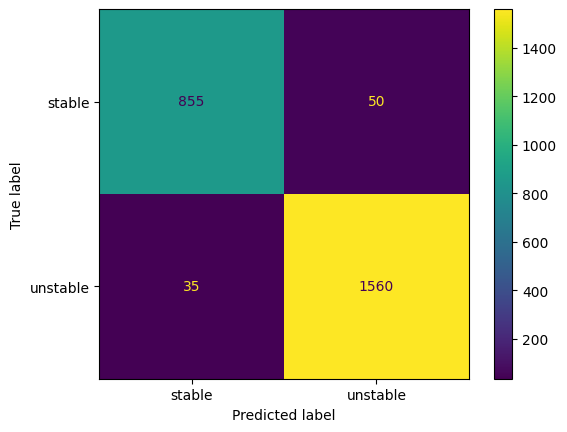

Precision: 0.969
Recall: 0.978
F1: 0.973


In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_rbf_hpt = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_rbf_hpt = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_rbf_hpt = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_rbf_hpt}")
print(f"Recall: {recall_svm_rbf_hpt}")
print(f"F1: {F1_svm_rbf_hpt}")

# **Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [32]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Tuning the hyperparameters

In [33]:
# For decision tree, we tune the hyperparameters max_depth, max_features, max_leaf_nodes, min_samples_leaf and min_samples_split
hpt_dt = {
    "max_depth": [i for i in range(3, 16)],
    "max_features": [i for i in range(2, 13)],
    "max_leaf_nodes": [i for i in range(10, 51)],
    "min_samples_leaf": [i for i in range(100, 501, 50)],
    "min_samples_split": [i for i in range(100, 1001, 50)]
}

In [34]:
print(hpt_dt)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_leaf_nodes': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'min_samples_leaf': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'min_samples_split': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]}


In [35]:
# Performing random search
rs_dt = RandomizedSearchCV(estimator=dt,
                           param_distributions=hpt_dt,
                           cv=5)

rs_dt.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [100, 150, 200, 250,
                                                             300, 350, 400, 450,
                                                             500],
                                        'min_samples_split': [100, 150, 200,
                                                              250, 300, 350,
                                                              400, 450, 500,
                                                              550, 600, 650,
                                                              700, 750, 800,
                                                              850, 900, 950,
                                                              1000]})

In [36]:
print(rs_dt.best_params_)

{'min_samples_split': 150, 'min_samples_leaf': 150, 'max_leaf_nodes': 34, 'max_features': 7, 'max_depth': 13}


In [37]:
print(rs_dt.best_score_)

0.7792


In [38]:
print(rs_dt.best_estimator_)

DecisionTreeClassifier(max_depth=13, max_features=7, max_leaf_nodes=34,
                       min_samples_leaf=150, min_samples_split=150,
                       random_state=42)


Train the model with the resulting combination of hyperparameter values

In [39]:
dt_hpt = DecisionTreeClassifier(max_depth=13, max_features=7, max_leaf_nodes=34, min_samples_leaf=150,
                                min_samples_split=150, random_state=42)
dt_hpt.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=13, max_features=7, max_leaf_nodes=34,
                       min_samples_leaf=150, min_samples_split=150,
                       random_state=42)

In [40]:
# Predict class using test set
y_pred = dt_hpt.predict(X_test_std)
print(y_pred)

[1 1 1 ... 0 1 1]


In [41]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

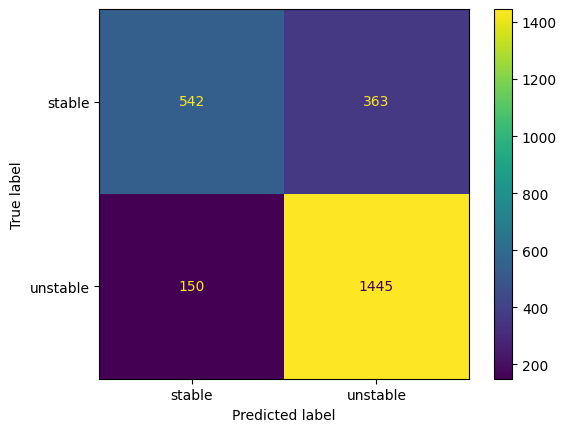

Precision: 0.799
Recall: 0.906
F1: 0.849


In [42]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_dt_hpt = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_dt_hpt = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_dt_hpt = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_dt_hpt}")
print(f"Recall: {recall_dt_hpt}")
print(f"F1: {F1_dt_hpt}")

# **Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [44]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Tuning the hyperparameters

In [45]:
# For random forest, we tune the hyperparameters n_estimators, max_depth, max_features, max_leaf_nodes, min_samples_leaf and min_samples_split
hpt_rf = {
    "n_estimators": [i for i in range(50, 151, 10)],
    "max_depth": [i for i in range(3, 16)],
    "max_features": [i for i in range(2, 13)],
    "max_leaf_nodes": [i for i in range(10, 51)],
    "min_samples_leaf": [i for i in range(100, 501, 50)],
    "min_samples_split": [i for i in range(100, 1001, 50)]
}

In [46]:
print(hpt_rf)

{'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_leaf_nodes': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'min_samples_leaf': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'min_samples_split': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]}


In [47]:
# Performing random search
rs_rf = RandomizedSearchCV(estimator=rf,
                           param_distributions=hpt_rf,
                           cv=5)

rs_rf.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [100, 150, 200, 250,
                                                             300, 350, 400, 450,
                                                             500],
                                        'min_samples_split': [100, 150, 200,
                                                              250, 300, 350,
                                                              400, 450, 500,
                                                              550, 600, 650,
                                                              700, 750, 800,
                                                              850, 900, 950,
                                                              1000],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150]})

In [48]:
print(rs_rf.best_params_)

{'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 200, 'max_leaf_nodes': 46, 'max_features': 12, 'max_depth': 11}


In [49]:
print(rs_rf.best_score_)

0.8245333333333333


In [50]:
print(rs_rf.best_estimator_)

RandomForestClassifier(max_depth=11, max_features=12, max_leaf_nodes=46,
                       min_samples_leaf=200, min_samples_split=150,
                       n_estimators=50, random_state=42)


Train the model with the resulting combination of hyperparameter values

In [51]:
rf_hpt = RandomForestClassifier(n_estimators=50, max_depth=11, max_features=12, max_leaf_nodes=46,
                                min_samples_leaf=200, min_samples_split=150, n_jobs=-1, random_state=42)
rf_hpt.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=11, max_features=12, max_leaf_nodes=46,
                       min_samples_leaf=200, min_samples_split=150,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [52]:
# Predict class using test set
y_pred = rf_hpt.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [53]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

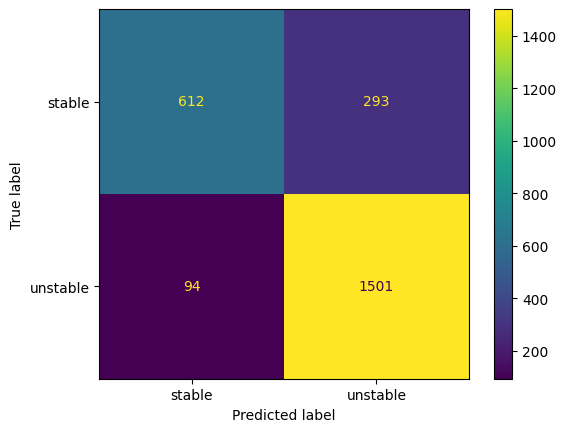

Precision: 0.837
Recall: 0.941
F1: 0.886


In [54]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_rf_hpt = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_rf_hpt = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_rf_hpt = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_rf_hpt}")
print(f"Recall: {recall_rf_hpt}")
print(f"F1: {F1_rf_hpt}")

# **AdaBoost**

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)

In [56]:
ab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

Tuning the hyperparameters

In [57]:
# For AdaBoost, we tune the hyperparameters learning_rate and n_estimators
hpt_ab = {
    "learning_rate": np.linspace(0.1, 1, 10),
    "n_estimators": [i for i in range(50, 151, 10)]
}

In [58]:
print(hpt_ab)

{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}


In [59]:
# Performing grid search
gs_adaboost = GridSearchCV(estimator=ab,
                           param_grid=hpt_ab,
                           cv=5)

gs_adaboost.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150]})

In [60]:
print(gs_adaboost.best_params_)

{'learning_rate': 0.5, 'n_estimators': 140}


In [61]:
print(gs_adaboost.best_score_)

0.8505333333333333


In [62]:
print(gs_adaboost.best_estimator_)

AdaBoostClassifier(learning_rate=0.5, n_estimators=140, random_state=42)


Train the model with the resulting combination of hyperparameter values

In [63]:
ab_hpt = AdaBoostClassifier(n_estimators=140, learning_rate=0.5, random_state=42)
ab_hpt.fit(X_train_std, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=140, random_state=42)

In [64]:
# Predict class using test set
y_pred = ab_hpt.predict(X_test_std)
print(y_pred)

[1 1 1 ... 0 1 1]


In [65]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

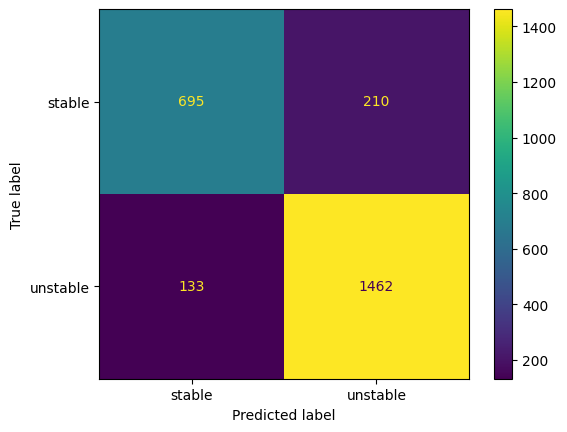

Precision: 0.874
Recall: 0.917
F1: 0.895


In [66]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_ab_hpt = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_ab_hpt = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_ab_hpt = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_ab_hpt}")
print(f"Recall: {recall_ab_hpt}")
print(f"F1: {F1_ab_hpt}")

# **Gradient Boosting**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

In [68]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Tuning the hyperparameters

In [69]:
# For Gradient Boosting, we tune the hyperparameters max_depth, n_estimators, and learning_rate
hpt_gb = {
    "max_depth": [i for i in range(2, 21)],
    "n_estimators": [i for i in range(50, 151, 10)],
    "learning_rate": np.linspace(0.1, 1, 10)
}

In [70]:
print(hpt_gb)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [71]:
# Performing random search
rs_grboost = RandomizedSearchCV(estimator=gb,
                                param_distributions=hpt_gb,
                                cv=5)

rs_grboost.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150]})

In [72]:
print(rs_grboost.best_params_)

{'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.4}


In [73]:
print(rs_grboost.best_score_)

0.9329333333333334


In [74]:
print(rs_grboost.best_estimator_)

GradientBoostingClassifier(learning_rate=0.4, max_depth=6, n_estimators=150,
                           random_state=42)


Train the model with the resulting combination of hyperparameter values

In [76]:
gb_hpt = GradientBoostingClassifier(n_estimators=150, learning_rate=0.4, max_depth=6, random_state=42)
gb_hpt.fit(X_train_std, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=6, n_estimators=150,
                           random_state=42)

In [77]:
# Predict class using test set
y_pred = gb_hpt.predict(X_test_std)
print(y_pred)

[1 1 1 ... 1 1 1]


In [78]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precission, recall, and F1 score using confusion matrix

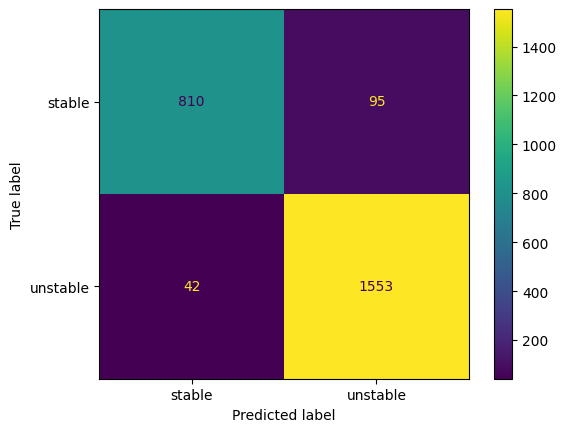

Precision: 0.942
Recall: 0.974
F1: 0.958


In [79]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_gb_hpt = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_gb_hpt = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_gb_hpt = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_gb_hpt}")
print(f"Recall: {recall_gb_hpt}")
print(f"F1: {F1_gb_hpt}")

# **Results after hyperparameter tuning**

In [80]:
models = ["RBF SVM", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting"]
F1_before_hpt = [0.967, 0.882, 0.941, 0.888, 0.946]
F1_after_hpt = [F1_svm_rbf_hpt, F1_dt_hpt, F1_rf_hpt, F1_ab_hpt, F1_gb_hpt]

Table of results

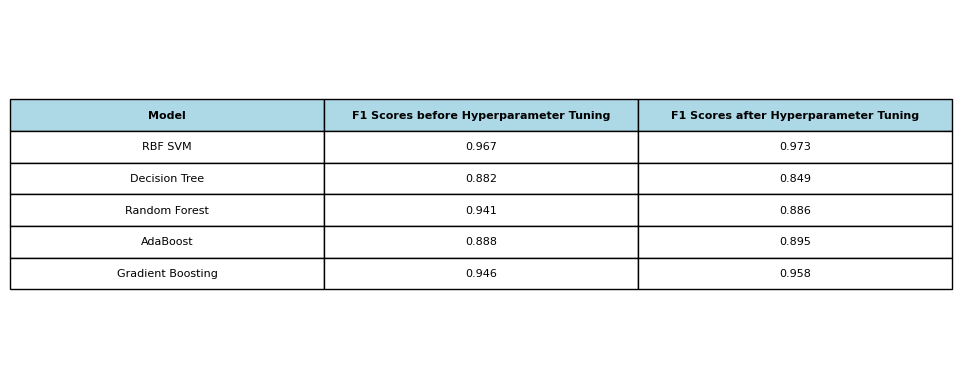

In [81]:
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')

table_data = list(zip(models, F1_before_hpt, F1_after_hpt))

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                 colLabels=["Model", "F1 Scores before Hyperparameter Tuning", "F1 Scores after Hyperparameter Tuning"])

table.scale(1.9, 1.9)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('lightblue')

plt.show()

Bar plot of results

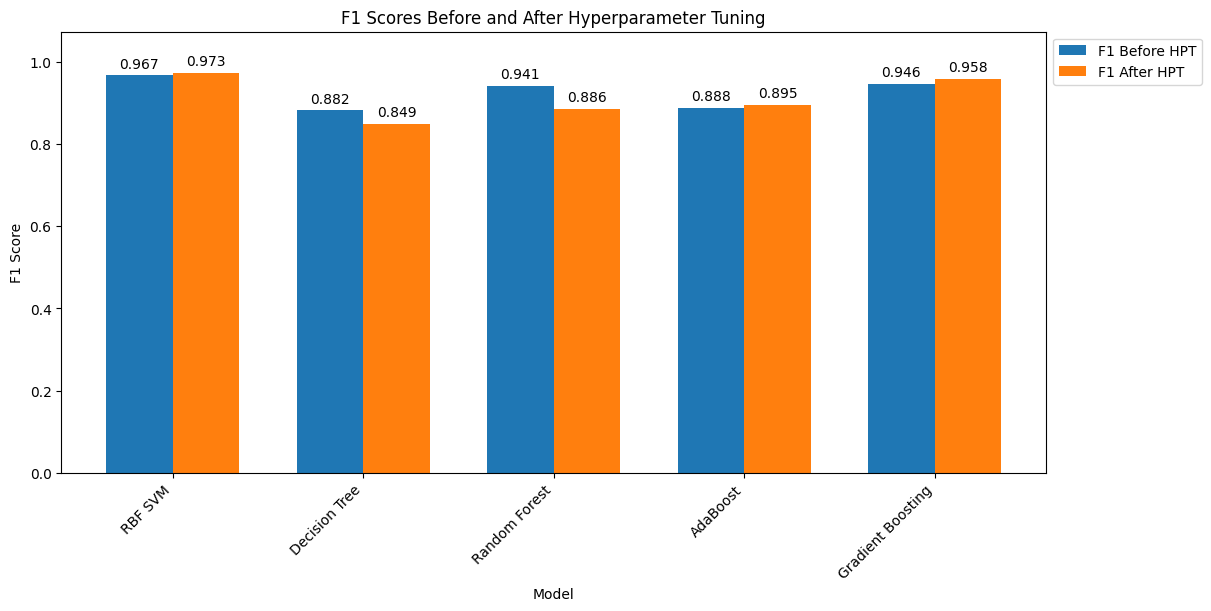

In [82]:
f1_scores = {
    'F1 Before HPT': F1_before_hpt,
    'F1 After HPT': F1_after_hpt
}

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')  # Increased figure size

for attribute, measurement in f1_scores.items():
    offset = width * multiplier
    bars = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(bars, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_xlabel('Model')
ax.set_title('F1 Scores Before and After Hyperparameter Tuning')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)

plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, max(max(F1_before_hpt), max(F1_after_hpt)) + 0.1)

plt.show()

# **Feature Reduction**

In [83]:
print(X_train_std.shape)

(7500, 12)


In [84]:
print(X_test_std.shape)

(2500, 12)


Applying PCA and reduce the number of dimensions from 12 to 6

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)

In [86]:
print(X_train_std_pca.shape)

(7500, 6)


In [87]:
print(X_test_std_pca.shape)

(2500, 6)


Training SVM (RBF) using this feature reduced dataset

In [88]:
svm_rbf_hpt_pca = SVC(kernel='rbf',C=9, gamma=0.1, random_state=42)
svm_rbf_hpt_pca.fit(X_train_std_pca, y_train)

SVC(C=9, gamma=0.1, random_state=42)

In [89]:
y_pred = svm_rbf_hpt_pca.predict(X_test_std_pca)
print(y_pred)

[0 1 1 ... 1 1 1]


In [90]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

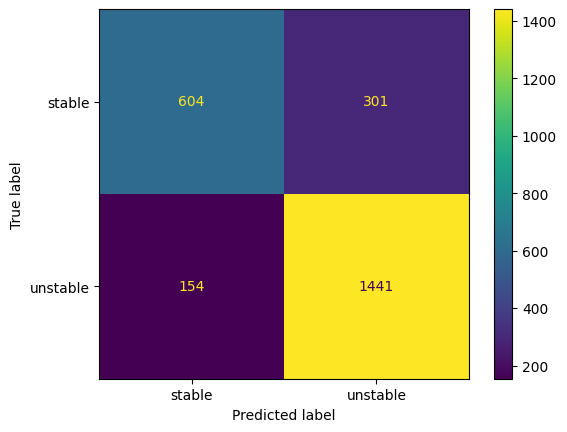

Precision: 0.827
Recall: 0.903
F1: 0.864


In [91]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_rbf_pca = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_rbf_pca = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_rbf_pca = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_rbf_pca}")
print(f"Recall: {recall_svm_rbf_pca}")
print(f"F1: {F1_svm_rbf_pca}")

# **Feature Selection**

In [92]:
print(X_train_std.shape)

(7500, 12)


In [93]:
print(X_test_std.shape)

(2500, 12)


Applying SelectPercentile method to retain 50% of the highest scoring features

In [94]:
from sklearn.feature_selection import SelectPercentile, f_classif

sp = SelectPercentile(score_func=f_classif, percentile=50)
X_train_std_sp = sp.fit_transform(X_train_std, y_train)
X_test_std_sp = sp.transform(X_test_std)

In [95]:
print(X_train_std_sp.shape)

(7500, 6)


In [96]:
print(X_test_std_sp.shape)

(2500, 6)


Training SVM (RBF) using the selected features

In [97]:
svm_rbf_hpt_sp = SVC(kernel='rbf',C=9, gamma=0.1, random_state=42)
svm_rbf_hpt_sp.fit(X_train_std_sp, y_train)

SVC(C=9, gamma=0.1, random_state=42)

In [98]:
y_pred = svm_rbf_hpt_sp.predict(X_test_std_sp)
print(y_pred)

[0 1 1 ... 1 1 1]


In [99]:
print(y_test)

[1 1 1 ... 1 1 1]


Compute precision, recall, and F1 score using confusion matrix

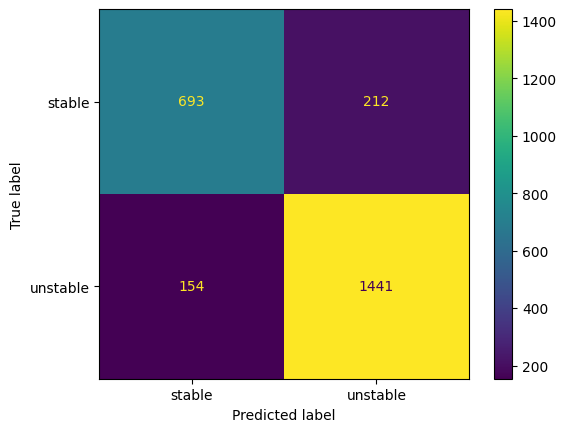

Precision: 0.872
Recall: 0.903
F1: 0.887


In [100]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

display.plot()
plt.show()

precision_svm_rbf_sp = round(precision_score(y_true=y_test, y_pred=y_pred), 3)
recall_svm_rbf_sp = round(recall_score(y_true=y_test, y_pred=y_pred), 3)
F1_svm_rbf_sp = round(f1_score(y_true=y_test, y_pred=y_pred), 3)

print(f"Precision: {precision_svm_rbf_sp}")
print(f"Recall: {recall_svm_rbf_sp}")
print(f"F1: {F1_svm_rbf_sp}")

Features selected using SelectPercentile method

In [101]:
print(f"Features selected: {sp.get_feature_names_out(X.columns)}")

Features selected: ['tau1' 'tau2' 'tau3' 'tau4' 'g2' 'g3']


# **Data Visualization**

In [102]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_X = tsne.fit_transform(X)

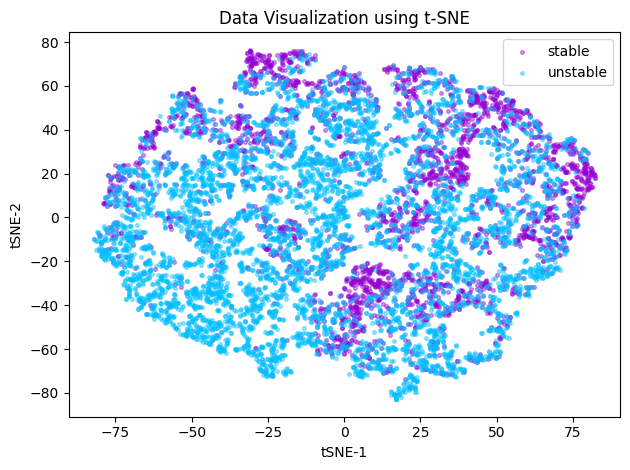

In [103]:
plt.scatter(tsne_X[y == 0, 0], tsne_X[y == 0, 1], color='darkviolet', alpha=0.4, s=7, label='stable')
plt.scatter(tsne_X[y == 1, 0], tsne_X[y == 1, 1], color='deepskyblue', alpha=0.4, s=7, label='unstable')
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.title("Data Visualization using t-SNE")
plt.legend()

plt.tight_layout()
plt.show()